In [7]:
import pandas as pd

In [43]:
df_members =pd.read_csv("data/kkbox-music-recommendation-challenge/members.csv")

In [44]:
df_members.groupby("city").count().sort_values("msno")

,msno,bd,gender,registered_via,registration_init_time,expiration_date
city,,,,,,
19,11,11,11,11,11,11
20,27,27,27,27,27,27
16,35,35,34,35,35,35
7,93,93,84,93,93,93
17,152,152,138,152,152,152
3,204,204,185,204,204,204
21,213,213,193,213,213,213
10,216,216,198,216,216,216
18,259,259,244,259,259,259


In [45]:
df_members = df_members[(df_members["city"] == 1)]

In [50]:
df_songs = pd.read_csv("data/kkbox-music-recommendation-challenge/songs.csv")

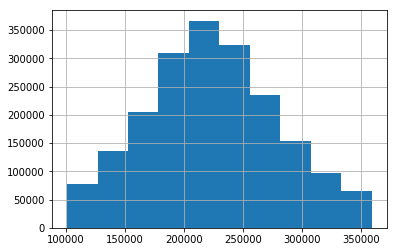

In [79]:
df_songs.song_length.hist()

In [65]:
df_songs = df_songs[df_songs.song_length < df_songs.song_length.quantile(q=0.95)]

In [69]:
df_songs.song_length.max()/1000/60

5.9803

In [78]:
df_songs.song_length.mean()/1000/60

3.737036710501476

In [84]:
df_songs = df_songs[df_songs.song_length > df_songs.song_length.quantile(q=0.05)]

In [86]:
df_songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [96]:
df_songs.groupby("language").count().sort_values("song_id")/df_songs.shape[0]*100

,song_id,song_length,genre_ids,artist_name,composer,lyricist
language,,,,,,
38.0,0.089504,0.089504,0.063519,0.089504,0.061594,0.037320
59.0,0.392875,0.392875,0.371542,0.392875,0.294924,0.035288
45.0,0.761529,0.761529,0.289096,0.761529,0.236056,0.590756
10.0,0.807404,0.807404,0.792326,0.807404,0.455057,0.357106
31.0,1.920799,1.920799,1.861718,1.920799,0.772811,0.558943
24.0,2.106437,2.106437,2.095476,2.106437,1.613953,0.806281
17.0,4.354881,4.354881,4.175767,4.354881,3.161125,2.035165
3.0,5.235963,5.235963,5.165975,5.235963,3.382799,2.790546
-1.0,23.708947,23.708947,22.564916,23.708947,11.536666,1.341432


In [94]:
df_songs.shape

(1870315, 7)

In [98]:
pd.get_dummies(df_songs, columns=["language"])[["language_-1.0", "language_3.0", "language_52.0"]]

,language_-1.0,language_3.0,language_52.0
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,1
...,...,...,...
2296312,0,0,1
2296313,0,0,1
2296316,0,1,0
2296318,0,0,1


In [103]:
df_songs = df_songs.join(pd.get_dummies(df_songs, columns=["language"])[["language_-1.0", "language_3.0", "language_52.0"]])

In [106]:
df_songs.drop("language", axis=1, inplace=True)

In [108]:
df_songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language_-1.0,language_3.0,language_52.0
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,0,1,0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,0,0,0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,0,0,0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,0,1,0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,0,0,1
...,...,...,...,...,...,...,...,...,...
2296312,UmVIdVUcfq15Egwrv2m3zbqVxkuzCTL1rWJ2lBd5GGs=,233964,1572|275,The Jackals,NaN,NaN,0,0,1
2296313,/CAX/IYPCRN++OIqEX8arRHs1RTeQKYLouEeyFakD6Y=,158452,465,Various Artists,NaN,NaN,0,0,1
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,0,1,0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,0,0,1


In [109]:
df_train = pd.read_csv("data/kkbox-music-recommendation-challenge/train.csv")

In [112]:
df_train = df_train.join(df_songs.set_index("song_id"), on="song_id").join(df_members.set_index("msno"), on="msno")

In [118]:
df_train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language_-1.0', 'language_3.0',
       'language_52.0', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [119]:
df_filt = df_train[["song_length", "language_-1.0", "language_3.0", "language_52.0", "registered_via", "registration_init_time", "expiration_date", "target"]]

In [132]:
df_filt.dropna(inplace=True)

c:\users\oleh.smolkin\appdata\local\continuum\anaconda3\envs\allez\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
from sklearn.model_selection import train_test_split

In [133]:
train, test = train_test_split(df_filt)

In [134]:
train, val = train_test_split(train)

In [144]:
from sklearn.linear_model import LogisticRegression

In [157]:
lr = LogisticRegression(C=0.5)

In [158]:
train_y = train["target"]

In [159]:
train_x = train.drop("target", axis=1)

In [160]:
lr.fit(train_x, train_y)

c:\users\oleh.smolkin\appdata\local\continuum\anaconda3\envs\allez\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
val_y = val["target"]
val_x = val.drop("target", axis=1)

In [162]:
val_x

,song_length,language_-1.0,language_3.0,language_52.0,registered_via,registration_init_time,expiration_date
5110294,284212.0,0.0,1.0,0.0,4.0,20161227.0,20161230.0
5444699,237792.0,0.0,1.0,0.0,7.0,20131212.0,20170930.0
3107164,266704.0,0.0,0.0,0.0,7.0,20160804.0,20171004.0
2812268,295444.0,0.0,1.0,0.0,7.0,20140912.0,20170916.0
4739945,197276.0,0.0,1.0,0.0,9.0,20141223.0,20170909.0
...,...,...,...,...,...,...,...
2375545,233743.0,1.0,0.0,0.0,4.0,20151109.0,20170908.0
3555159,288995.0,0.0,1.0,0.0,9.0,20151219.0,20170810.0
3527837,255791.0,0.0,0.0,0.0,7.0,20120818.0,20170908.0
1851763,246700.0,0.0,0.0,0.0,7.0,20161110.0,20170909.0


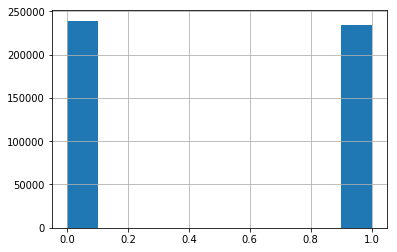

In [163]:
val["target"].hist()


In [164]:
lr.predict(val_x) 

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score

In [166]:
accuracy_score(train_y, lr.predict(train_x))

0.5136075570124423

In [167]:
accuracy_score(val_y, lr.predict(val_x))

0.514580703012154